source myenv/bin/activate\
echo "deb http://packages.cloud.google.com/apt gcsfuse-$(lsb_release -c -s) main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list\
curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -\
sudo apt update\
sudo apt install gcsfuse\
sudo gcsfuse -o allow_other --implicit-dirs voicemodel gcs-bucket/\

In [1]:
import librosa
import matplotlib.pyplot as plt

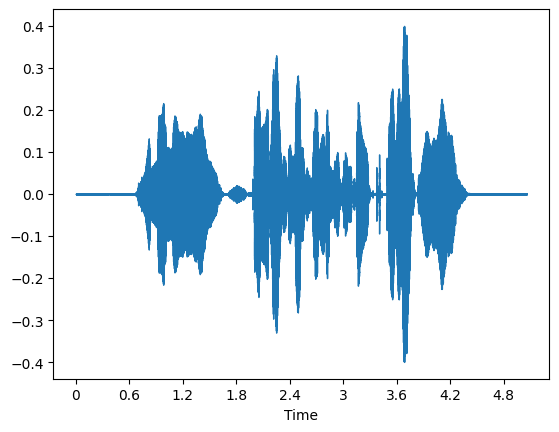

In [2]:
file = 'gcs-bucket/data/F2001/F2001_000001.wav'
y, sr = librosa.load(file)
librosa.display.waveshow(y, sr=sr)
plt.show()

In [3]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
    print(f"GPU device name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available")

GPU is available
GPU device name: Tesla T4


In [4]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [5]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [7]:
import sys

!echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

# 나눔 폰트를 설치합니다.
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# 나눔바른고딕 폰트로 설정합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 표시 오류 수정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: DbDriver "passwords" warning: could not open /var/cache/debconf/passwords.dat: Permission denied
debconf: DbDriver "config": could not write /var/cache/debconf/config.dat-new: Permission denied


In [8]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [9]:
# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Embedding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model, to_categorical

2024-10-17 08:59:37.436369: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-17 08:59:38.180215: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 08:59:39.677281: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [10]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [11]:
import os
from glob import glob

# 데이터 경로 담기
wav_data = 'gcs-bucket/data/'

# 해당 경로를 통해 폴더 찾기
directories = glob(os.path.join(wav_data, '*'))
directories

['gcs-bucket/data/F2001',
 'gcs-bucket/data/F2002',
 'gcs-bucket/data/F2003',
 'gcs-bucket/data/F2004',
 'gcs-bucket/data/F2005',
 'gcs-bucket/data/F2006',
 'gcs-bucket/data/F2007',
 'gcs-bucket/data/F2008',
 'gcs-bucket/data/F2009',
 'gcs-bucket/data/F2010',
 'gcs-bucket/data/F2011',
 'gcs-bucket/data/F2012',
 'gcs-bucket/data/F2013',
 'gcs-bucket/data/F2014',
 'gcs-bucket/data/F2015',
 'gcs-bucket/data/F2016',
 'gcs-bucket/data/F2017',
 'gcs-bucket/data/F2018',
 'gcs-bucket/data/F2019',
 'gcs-bucket/data/F2020',
 'gcs-bucket/data/F2021',
 'gcs-bucket/data/F2022',
 'gcs-bucket/data/F2023',
 'gcs-bucket/data/F2024',
 'gcs-bucket/data/F2025',
 'gcs-bucket/data/F2026',
 'gcs-bucket/data/F2027',
 'gcs-bucket/data/F2028',
 'gcs-bucket/data/F2029',
 'gcs-bucket/data/F2030',
 'gcs-bucket/data/F2031',
 'gcs-bucket/data/F2032',
 'gcs-bucket/data/F2033',
 'gcs-bucket/data/F2034',
 'gcs-bucket/data/F2035',
 'gcs-bucket/data/F2036',
 'gcs-bucket/data/F2037',
 'gcs-bucket/data/F2038',
 'gcs-bucket

In [12]:
# 폴더 이름 저장할 초기 list 생성
dir_names = []

for directory in directories:
    # 디렉토리명 저장
    dir_names.append(os.path.basename(directory))
dir_names

['F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020',
 'F2021',
 'F2022',
 'F2023',
 'F2024',
 'F2025',
 'F2026',
 'F2027',
 'F2028',
 'F2029',
 'F2030',
 'F2031',
 'F2032',
 'F2033',
 'F2034',
 'F2035',
 'F2036',
 'F2037',
 'F2038',
 'F2039',
 'F2040',
 'F2041',
 'F2042',
 'F2043',
 'F2044',
 'F2045',
 'F2046',
 'F2047',
 'F2048',
 'F2049',
 'F2050',
 'F2051',
 'F2052',
 'F2053',
 'F2054',
 'F2055',
 'F2056',
 'F2057',
 'F2058',
 'F2059',
 'F2060',
 'F2061',
 'F2062',
 'F2063',
 'F2064',
 'F2065',
 'F2066',
 'F2067',
 'F2068',
 'F2069',
 'F2070',
 'F2071',
 'F2072',
 'F2073',
 'F3001',
 'F3002',
 'F3003',
 'F3004',
 'F3005',
 'F3006',
 'F3007',
 'F3008',
 'F3009',
 'F3010',
 'F3011',
 'F3012',
 'F3013',
 'F3014',
 'F3015',
 'F3016',
 'F3017',
 'F3018',
 'F3019',
 'F3020',
 'F3021',
 'F3022',
 'F3023',
 'F3024',
 'F3025',
 'F3026',
 'F3027',


In [13]:
file_paths = []

for dir_name in dir_names:
    # 파일 경로 담기
    wav_file = f'gcs-bucket/data/{dir_name}/'
    # 해당 경로를 통해 파일 찾기
    file_paths.extend(sorted(glob(os.path.join(wav_file, '*'))))

In [14]:
file_paths

['gcs-bucket/data/F2001/F2001_000001.wav',
 'gcs-bucket/data/F2001/F2001_000002.wav',
 'gcs-bucket/data/F2001/F2001_000003.wav',
 'gcs-bucket/data/F2001/F2001_000004.wav',
 'gcs-bucket/data/F2001/F2001_000005.wav',
 'gcs-bucket/data/F2001/F2001_000006.wav',
 'gcs-bucket/data/F2001/F2001_000007.wav',
 'gcs-bucket/data/F2001/F2001_000008.wav',
 'gcs-bucket/data/F2001/F2001_000009.wav',
 'gcs-bucket/data/F2001/F2001_000010.wav',
 'gcs-bucket/data/F2001/F2001_000011.wav',
 'gcs-bucket/data/F2001/F2001_000012.wav',
 'gcs-bucket/data/F2001/F2001_000013.wav',
 'gcs-bucket/data/F2001/F2001_000014.wav',
 'gcs-bucket/data/F2001/F2001_000015.wav',
 'gcs-bucket/data/F2001/F2001_000016.wav',
 'gcs-bucket/data/F2001/F2001_000017.wav',
 'gcs-bucket/data/F2001/F2001_000018.wav',
 'gcs-bucket/data/F2001/F2001_000019.wav',
 'gcs-bucket/data/F2001/F2001_000020.wav',
 'gcs-bucket/data/F2001/F2001_000021.wav',
 'gcs-bucket/data/F2001/F2001_000022.wav',
 'gcs-bucket/data/F2001/F2001_000023.wav',
 'gcs-bucke

In [ ]:
import os
import torch
import soundfile as sf
import librosa
import pandas as pd
from transformers import HubertForSequenceClassification, Wav2Vec2Processor, Trainer, TrainingArguments
from transformers import HubertForSequenceClassification, Wav2Vec2FeatureExtractor
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score

# 1. CSV 파일 로드 및 전처리 (None 값 제거)
csv_file_path = '/home/mywinningtime/labeling.csv'
df = pd.read_csv(csv_file_path).dropna(subset=['감정'])  # None 값 제거

# 감정 레이블 정의 및 매핑
emotion_labels = df['감정'].unique().tolist()
label2id = {str(emotion): int(i) for i, emotion in enumerate(emotion_labels)}
id2label = {int(i): str(emotion) for i, emotion in enumerate(emotion_labels)}

# 2. 음성 파일 로드 함수 정의
def load_audio(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    speech, rate = sf.read(file_path)
    if rate != 16000:  # 16000Hz로 리샘플링
        speech = librosa.resample(speech, orig_sr=rate, target_sr=16000)
    return speech

# 3. SpeechDataset 클래스 정의
class SpeechDataset(Dataset):
    def __init__(self, df, base_directory, folders):
        self.df = df.reset_index(drop=True)  # 인덱스 재설정
        self.base_directory = base_directory
        self.folders = folders

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        folder_idx = (row['연번'] - 1) // 160  # 폴더 결정
        folder_name = self.folders[folder_idx]

        file_number = row['연번']
        file_name = f"{folder_name}_{file_number:06d}.wav"

        file_path = os.path.join(self.base_directory, folder_name, file_name)

        # 음성 파일 로드 및 전처리
        speech = load_audio(file_path)
        inputs = feature_extractor(speech, sampling_rate=16000, return_tensors="pt", padding=True)

        # 감정 레이블 변환
        label = label2id[row['감정']]

        return {
            "input_values": inputs.input_values[0],
            "attention_mask": inputs.attention_mask[0] if "attention_mask" in inputs else None,
            "labels": torch.tensor(label, dtype=torch.long),
        }

# 4. collate_fn 정의: 배치 생성 시 입력을 동일한 길이로 패딩
def collate_fn(batch):
    input_values = [item["input_values"] for item in batch]
    labels = torch.tensor([item["labels"] for item in batch], dtype=torch.long)
    input_values_padded = pad_sequence(input_values, batch_first=True, padding_value=0.0)
    attention_mask = (input_values_padded != 0).long()

    return {
        "input_values": input_values_padded,
        "attention_mask": attention_mask,
        "labels": labels,
    }

# 5. 평가 메트릭 함수 정의
def compute_metrics(pred):
    # predictions가 튜플로 반환되면 첫 번째 요소(logits)만 사용
    logits = pred.predictions[0] if isinstance(pred.predictions, tuple) else pred.predictions
    preds = logits.argmax(-1)  # 가장 높은 로짓 값의 인덱스가 예측 값
    acc = accuracy_score(pred.label_ids, preds)  # 정확도 계산
    return {"accuracy": acc}
    
# 6. 데이터셋 및 DataLoader 준비
audio_directory = "gcs-bucket/data/"

train_folders = [f"F{2001 + i}" for i in range(8)]  # M2001 ~ M2008
test_folders = [f"F{2009 + i}" for i in range(2)]  # M2009 ~ M2010

train_dataset = SpeechDataset(df, audio_directory, train_folders)
test_dataset = SpeechDataset(df, audio_directory, test_folders)

train_loader = DataLoader(train_dataset, batch_size=8, collate_fn=collate_fn, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, collate_fn=collate_fn)

# 7. 모델 및 프로세서 설정 (hubert-base-superb-er 사용)
model = HubertForSequenceClassification.from_pretrained(
    "superb/hubert-base-superb-er",
    num_labels=len(emotion_labels),  # 6개 클래스 (현재 CSV의 클래스 개수에 맞춰 조정)
    label2id=label2id,
    id2label=id2label,
    problem_type="single_label_classification",
    ignore_mismatched_sizes=True  # 크기 불일치 무시
)

feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("superb/hubert-base-superb-er")

# 8. 훈련 설정
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True,
)

# 9. Trainer 설정
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=feature_extractor,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
)

# 10. 모델 학습
trainer.train()

# 11. 테스트 평가
results = trainer.evaluate()
print(f"Test Results: {results}")

Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at superb/hubert-base-superb-er and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([4, 256]) in the checkpoint and torch.Size([6, 256]) in the model instantiated
- classifier.bias: found shape torch.Size([4]) in the checkpoint and torch.Size([6]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.786046,0.166667
2,No log,1.783735,0.166667
3,No log,1.782910,0.241667
